In [153]:
# pandas
import pandas as pd
# numpy
import numpy as np
# Scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
# matplotlib
import matplotlib.pyplot as plt
# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors

In [72]:
# Read file data
cardata = pd.read_csv("c:\\Users\\Sasha\\Desktop\\Py\\Git\\CarPrice\\CarPrice\\DataSet\\cars.csv")

In [73]:
# Check data composition
cardata.head()

manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
0  ...      True       True      True     False       True      False   
1  ...      True      False     False      True       True      False   
2  ...      True      False     False     False      False      False   
3  ...     False      False     False     False      False      False   
4  ...      True      False      True      True      False      False   

  feature_7  feature_8  feature_9  duration_listed  
0      True       True       True               16  
1     False      False       True               83  
2     False       True       True              151  
3     False      False      False               86  
4     False      False       True                7  

[5 rows x 30 columns]

In [74]:
# check availabe columns, data types, null values
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [75]:
corr_matrix = cardata.corr()

In [76]:
# display of correlation between price and features
corr_matrix["price_usd"].sort_values(ascending=False)

price_usd           1.000000
year_produced       0.705511
feature_7           0.498547
feature_3           0.470929
feature_6           0.451714
feature_8           0.449131
feature_5           0.434471
feature_2           0.338166
feature_4           0.336143
number_of_photos    0.316859
engine_capacity     0.296597
has_warranty        0.285532
feature_9           0.266156
feature_1           0.255806
up_counter          0.057382
duration_listed     0.033524
is_exchangeable    -0.000503
engine_has_gas     -0.062528
feature_0          -0.223896
odometer_value     -0.421204
Name: price_usd, dtype: float64

In [ ]:
cardata_df = cardata[:,["year_produced", "price_usd"]]


In [151]:
X = cardata[["year_produced"]]
Y = cardata[["price_usd"]]

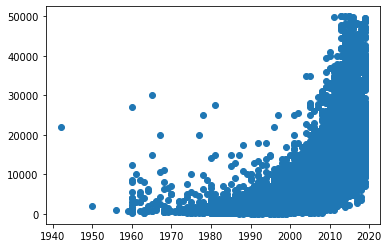

In [152]:
plt.scatter(X,Y)

In [90]:
Y.head()

price_usd
0   10900.00
1    5000.00
2    2800.00
3    9999.00
4    2134.11

In [91]:
X.head()

year_produced
0           2010
1           2002
2           2001
3           1999
4           2001

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [93]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)

In [94]:
tree_reg1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [96]:
y_predict = tree_reg1.predict(X_test)

In [98]:
mae_train = mean_absolute_error(y_test, y_predict)
print("Test Set Mean Absolute Error : %2f" %mae_train)

Test Set Mean Absolute Error : 2656.424925


In [70]:
round(mean_absolute_error(Y_train_set, y_predict),1)

2159.3

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [101]:
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [102]:
y_pred_lr = lr.predict(X_test)

In [103]:
mean_absolute_error(y_test, y_pred_lr)

2932.9486738564615

In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train,  y_train, scoring="r2", cv=5)
scores

array([0.46596296, 0.49882147, 0.49601939, 0.51885695, 0.50726686])

In [113]:
tree_reg1.predict([[2007]])


array([9531.86768788])

In [137]:
# Lets try random forests now
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
mean_absolute_error(y_test,y_pred_rf)

2485.5266432332396

In [138]:
rnd_clf.predict([[2007]])

array([8247.32806341])

In [142]:
# and easier way is to create Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train,y_train)
y_pred_gbrt = gbrt.predict(X_test)

In [143]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred_gbrt)

0.5831947376854038

In [145]:
mean_squared_error(y_test, y_pred_gbrt)

17045280.569908783

In [146]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train, y_train)
mean_squared_error(y_test,svm_reg.predict(X_test))

55179435.17073985